## In this program, our objective will be the prediction of type of glasses

Collect Data: It can be found in Kaggle - https://www.kaggle.com/datasets/uciml/glass/data

In [521]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline


from sklearn.compose import ColumnTransformer

In [522]:
import warnings


warnings.filterwarnings('ignore')



In [523]:
PATH_DATA = os.path.join(r'C:\Users\caioe\OneDrive\Área de Trabalho\Ford_Prices')


In [524]:
df = pd.read_csv(os.path.join(PATH_DATA, "glass.csv"))

2. EDA

Understand your data: Visualize the distribution of glasses features, investigate outliers, and look for missing data.

In [525]:
df.head(50)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [527]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [528]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [529]:
for column in df.columns:
    print(f"Unique Values of '{column}':")
    print(df[column].unique())
    print()

Unique Values of 'RI':
[1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.5

As there's no type 4, we will reduce elements of types bellow 5

In [530]:
df['Type'] = df['Type'].apply(lambda x: x-1 if x > 4 else x)
df['Type'] = df['Type'].apply(lambda x: x-1 if x > 0 else x)


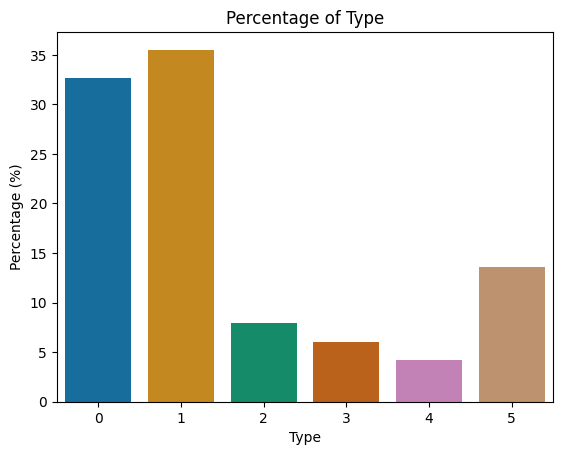

In [531]:
for column in df:
    if column == 'Type':
        counts = df[column].value_counts(normalize=True)  # Normaliza para obter as porcentagens
        percentages = counts * 100  

        # Criando um DataFrame para plotar
        percent_df = percentages.reset_index()
        percent_df.columns = [column, 'percentage']

        # Criando o gráfico
        sns.barplot(data=percent_df, x=column, y='percentage', palette='colorblind')

        # Exibindo o gráfico
        plt.ylabel('Percentage (%)')
        plt.title(f'Percentage of {column}')
        plt.show()

In [532]:
df['Type'].value_counts(normalize=True)*100

Type
1    35.514019
0    32.710280
5    13.551402
2     7.943925
3     6.074766
4     4.205607
Name: proportion, dtype: float64

Analizing numeric features

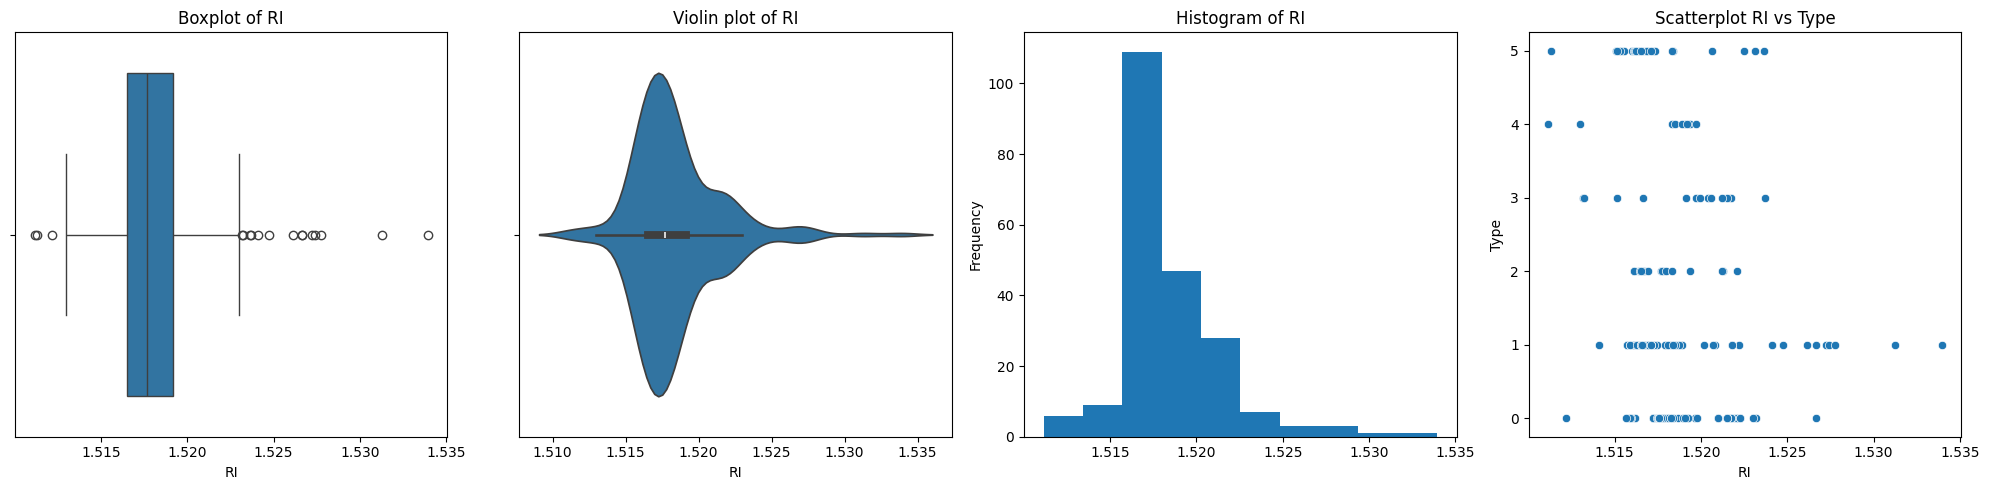

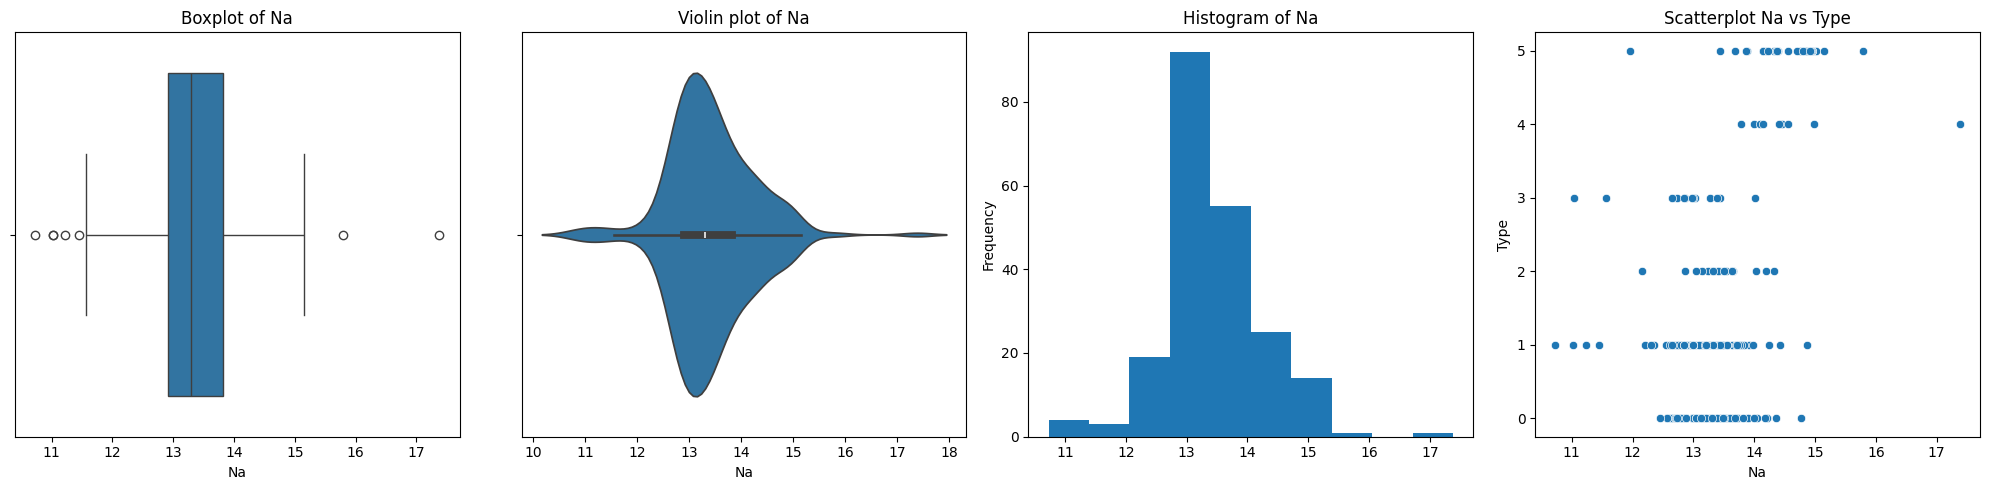

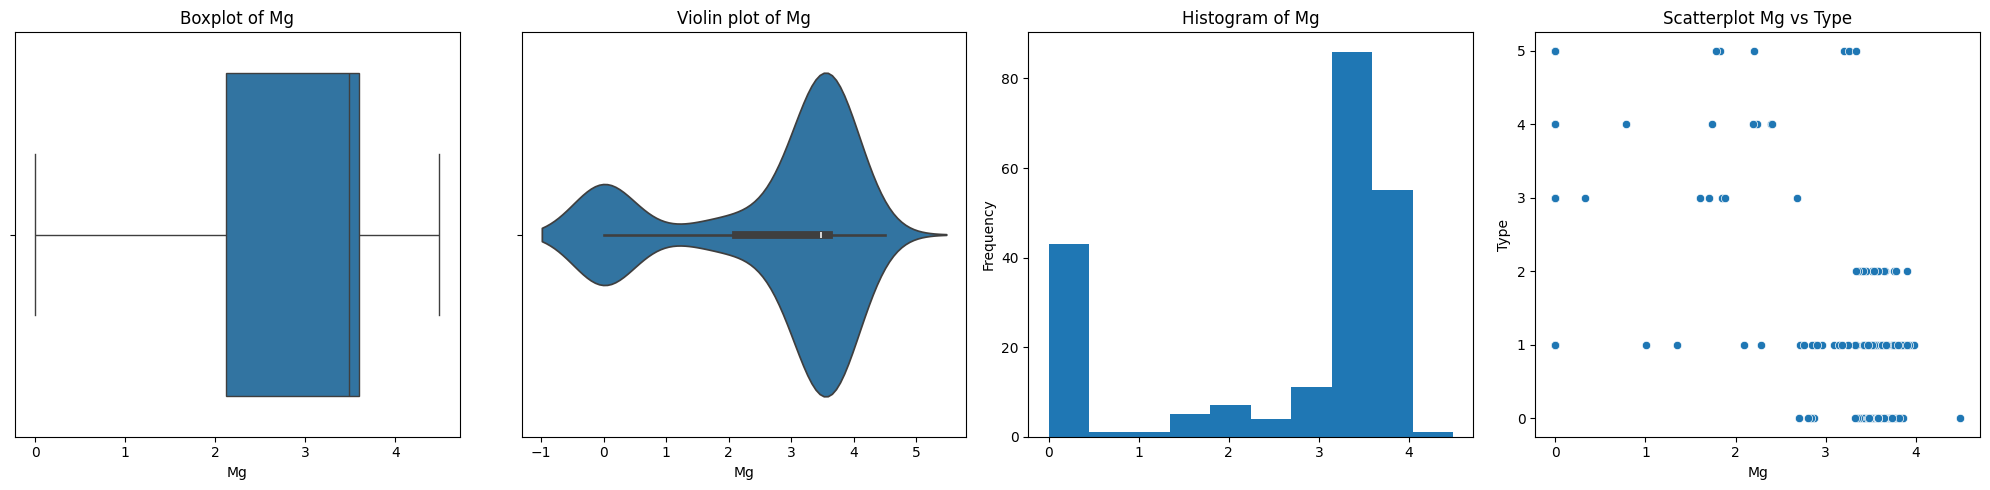

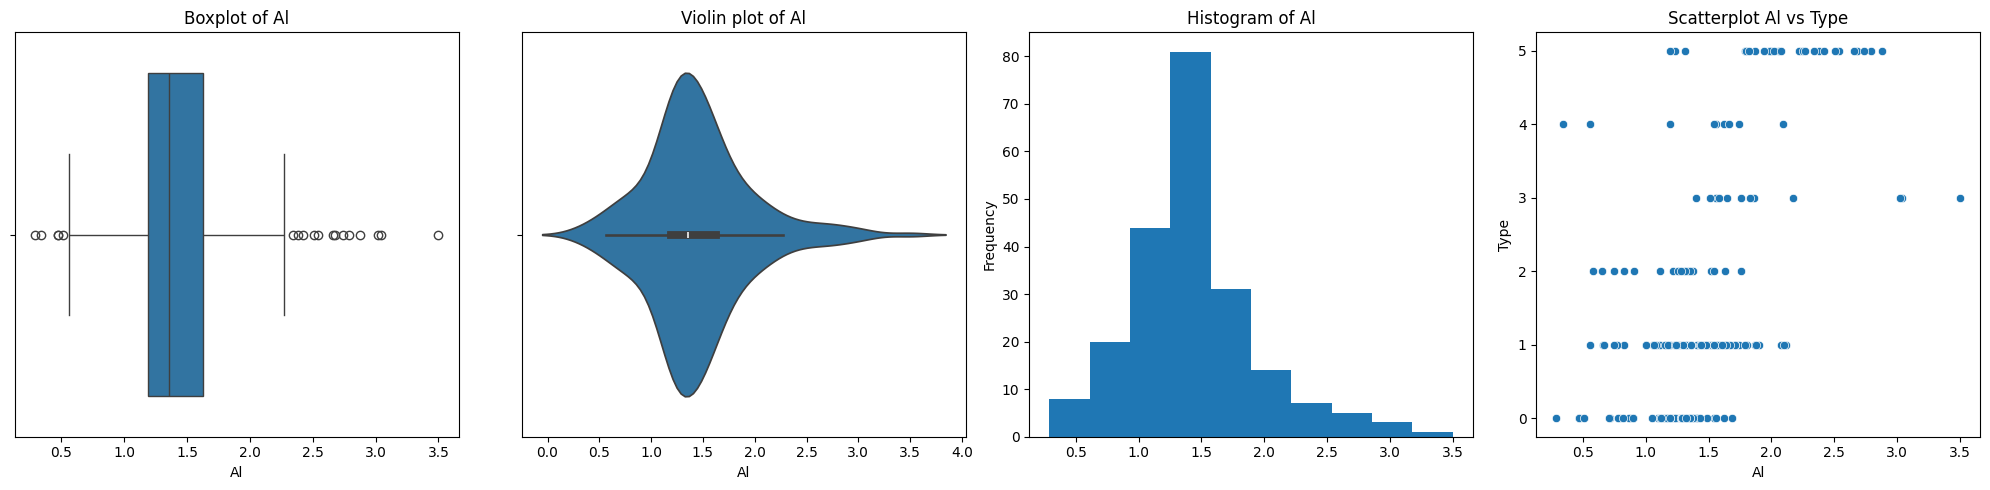

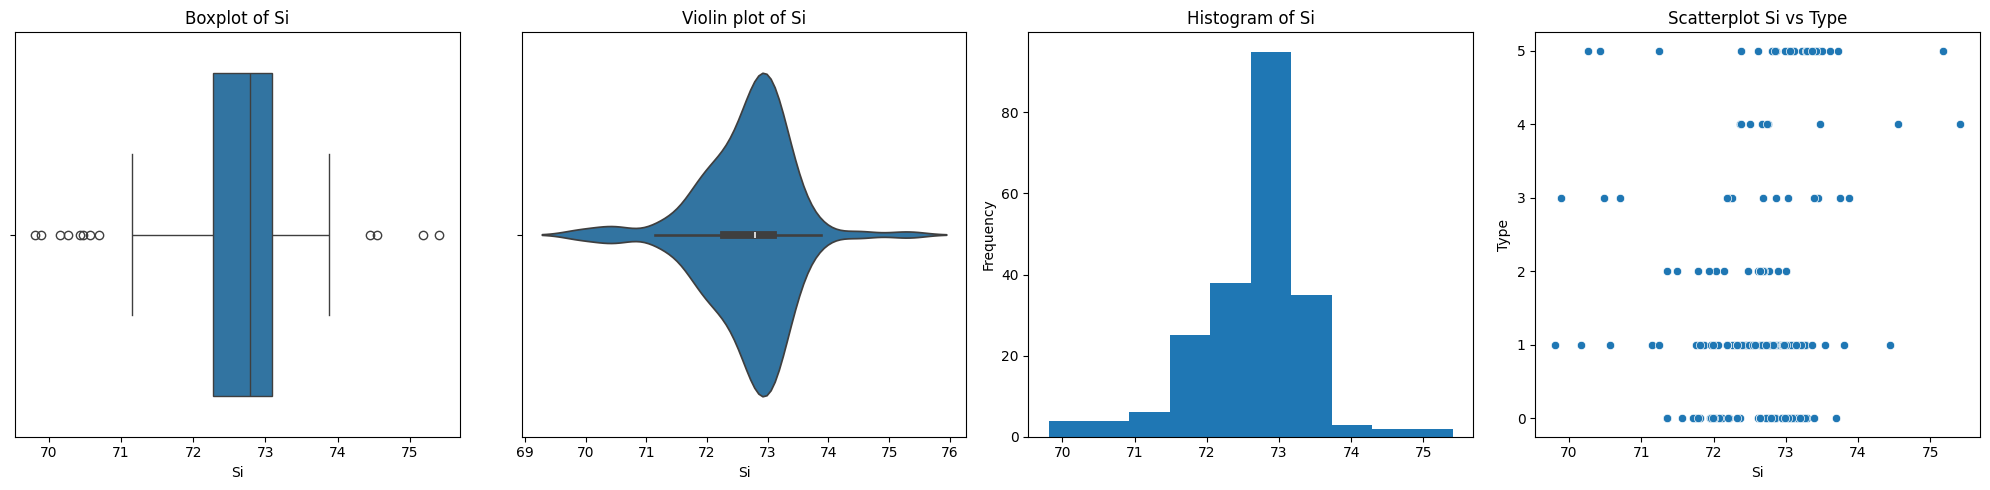

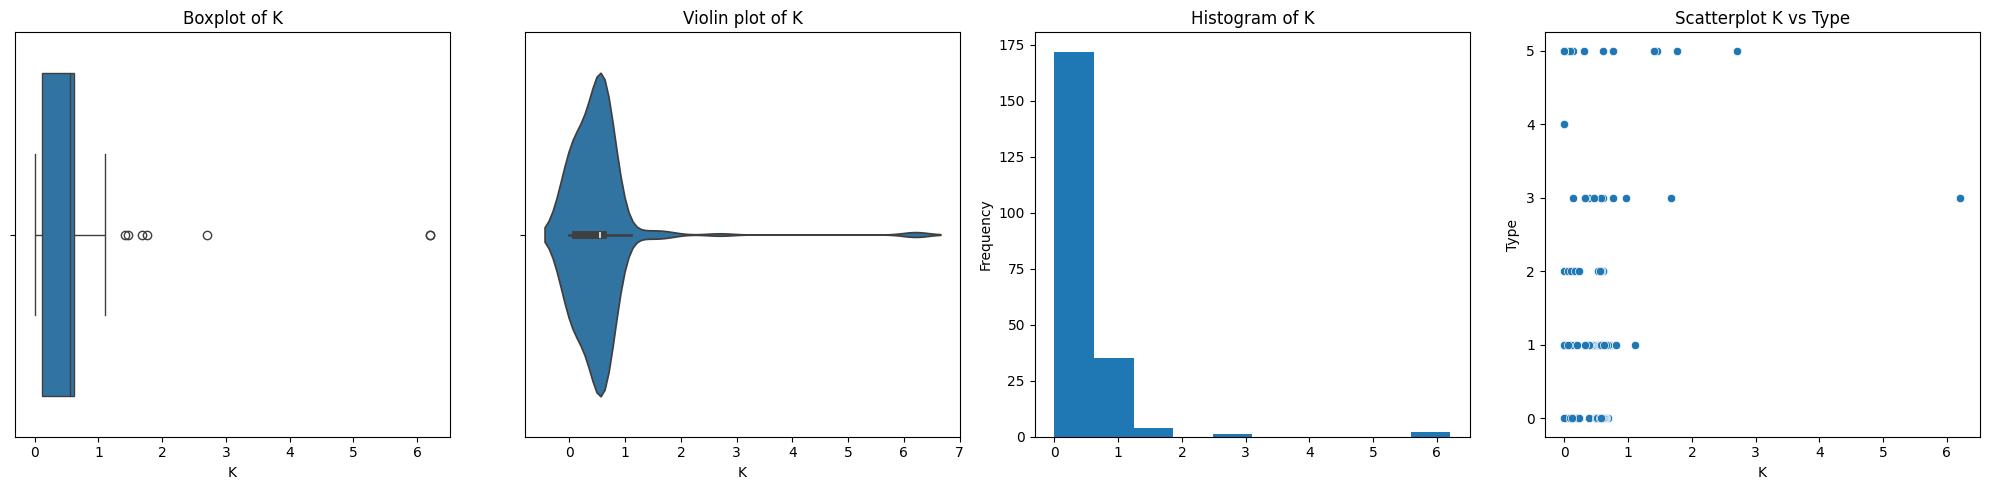

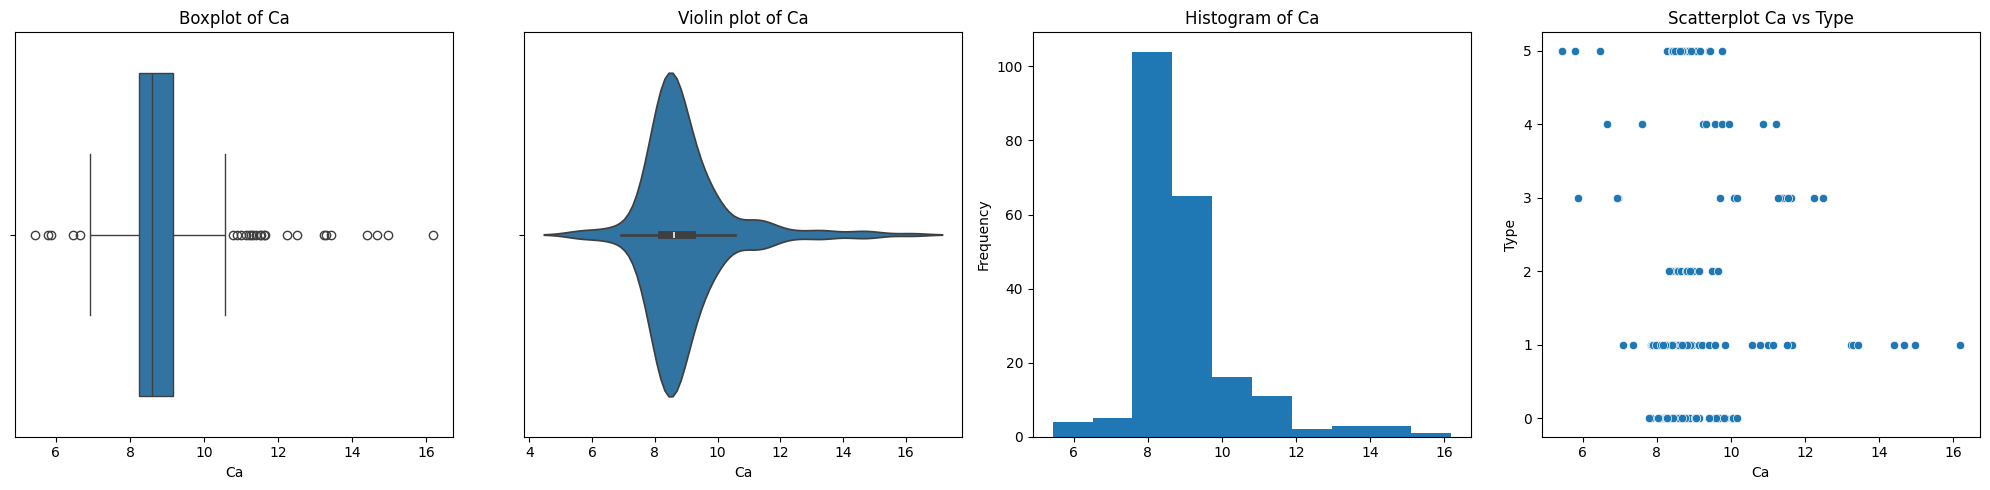

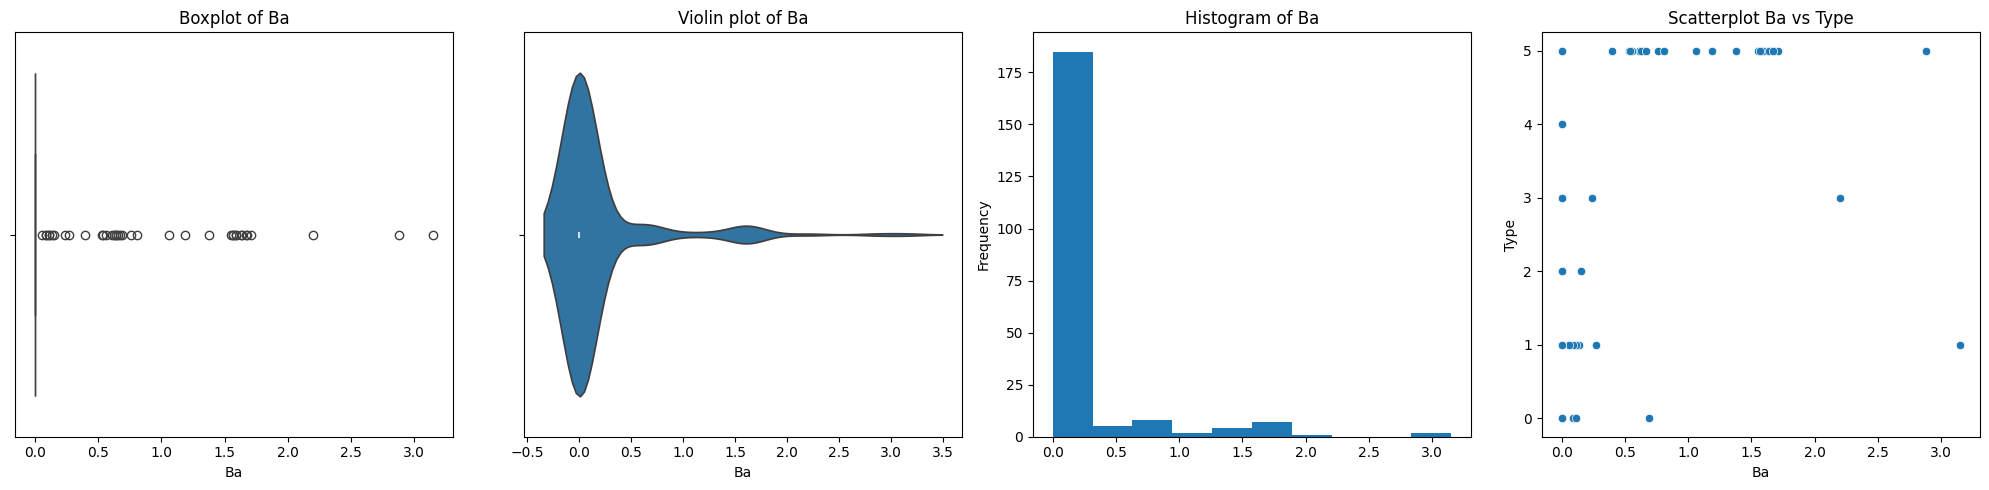

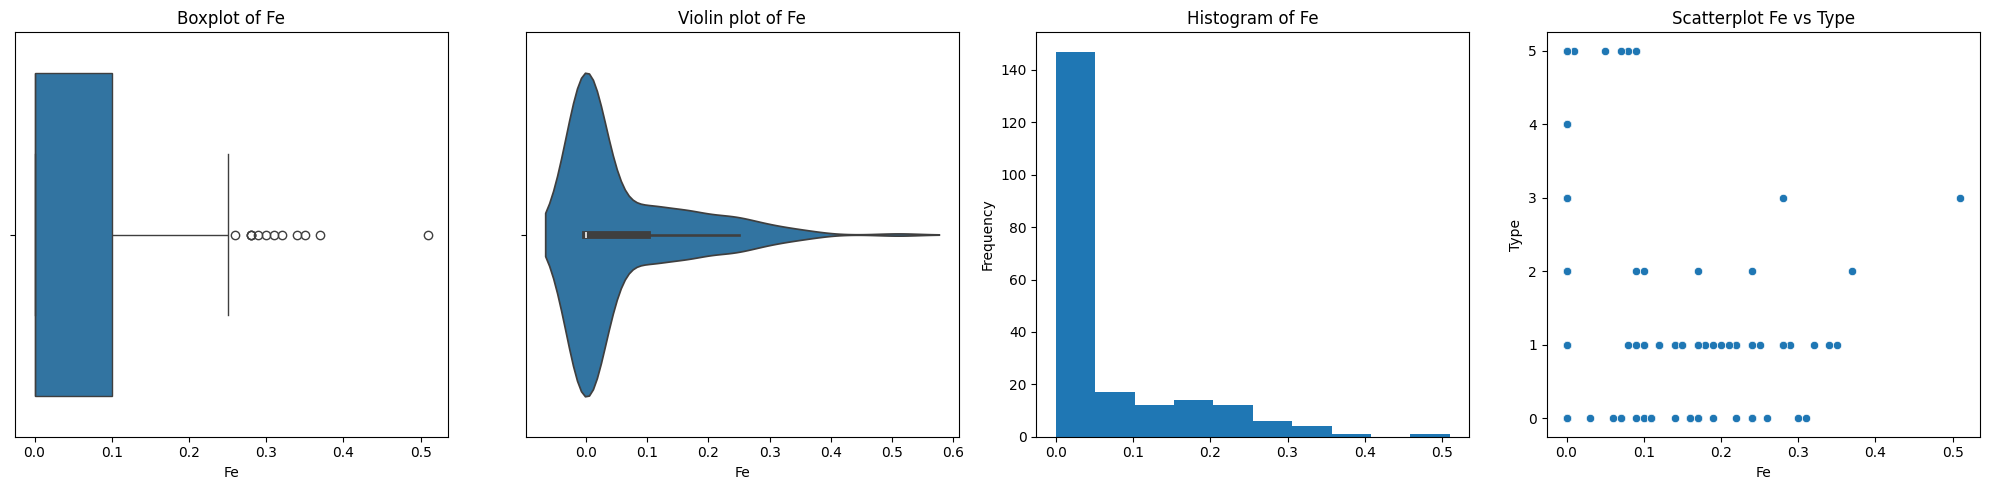

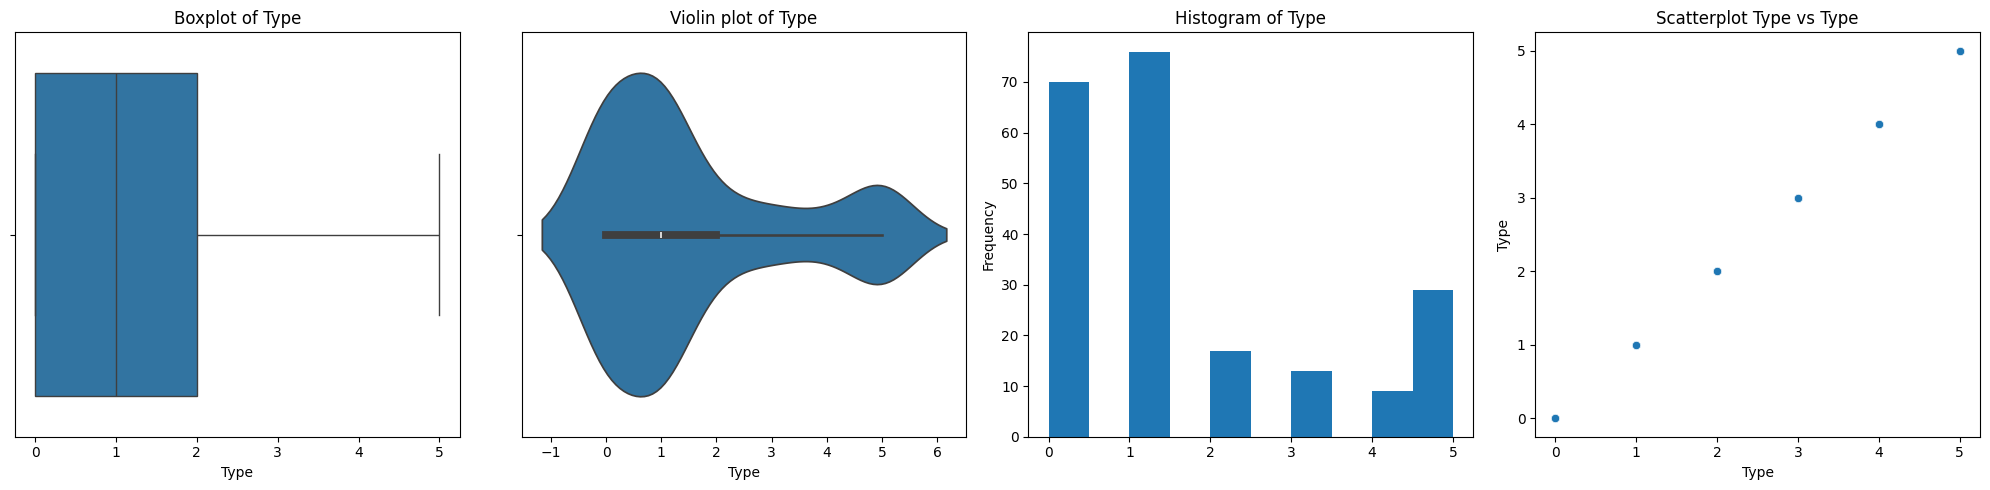

In [533]:


for column in df:
    if pd.api.types.is_numeric_dtype(df[column]):  
        
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))  
        
        
        sns.boxplot(data=df, x=column, ax=axes[0])
        axes[0].set_title(f'Boxplot of {column}')
        
        sns.violinplot(data=df, x=column, ax=axes[1])
        axes[1].set_title(f'Violin plot of {column}')
        
        
        df[column].plot.hist(ax=axes[2], bins=10)
        axes[2].set_title(f'Histogram of {column}')
        
        
        sns.scatterplot(data=df, x=column, y='Type', ax=axes[3])
        axes[3].set_title(f'Scatterplot {column} vs Type')
        
        
        plt.tight_layout()  
        plt.show()



Removing outliers won't be really necesary. 

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [535]:
def corr(df):
    df_corr = df
    correlation_matrix = df_corr.corr()
    plt.figure(figsize=(15, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    return plt.show()

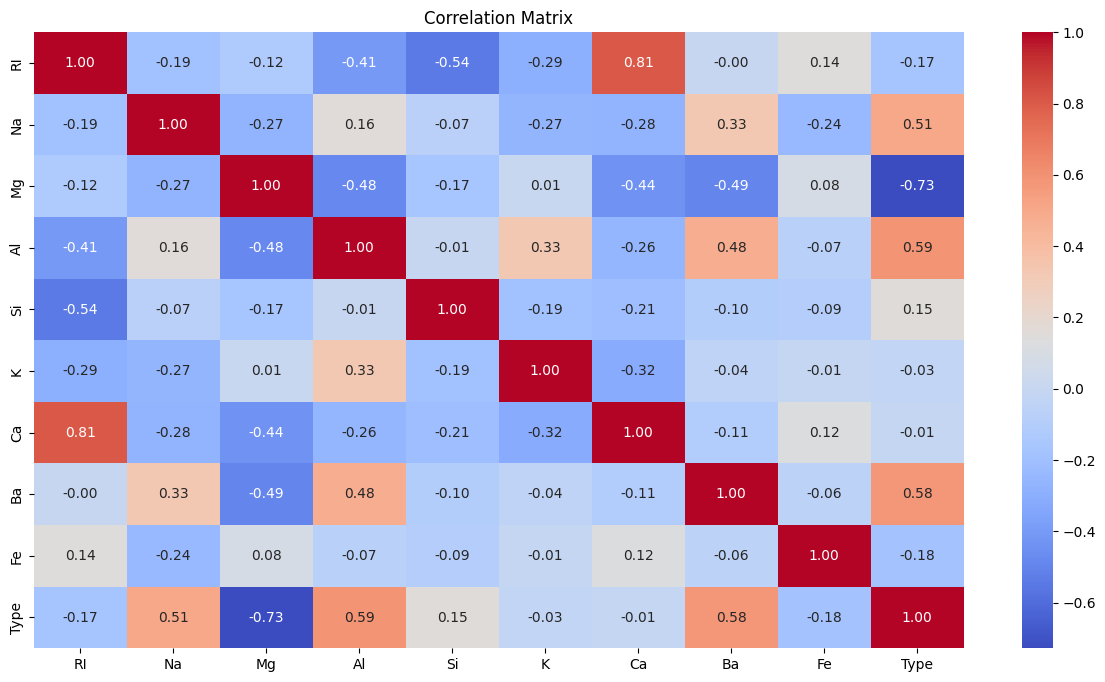

In [536]:
corr(df)

As it seems above, elimination of milage, manual_transmition and fueltype_Diesel seems a clever idea.

In [537]:
df.drop(columns =['Mg','Ca',], inplace = True)

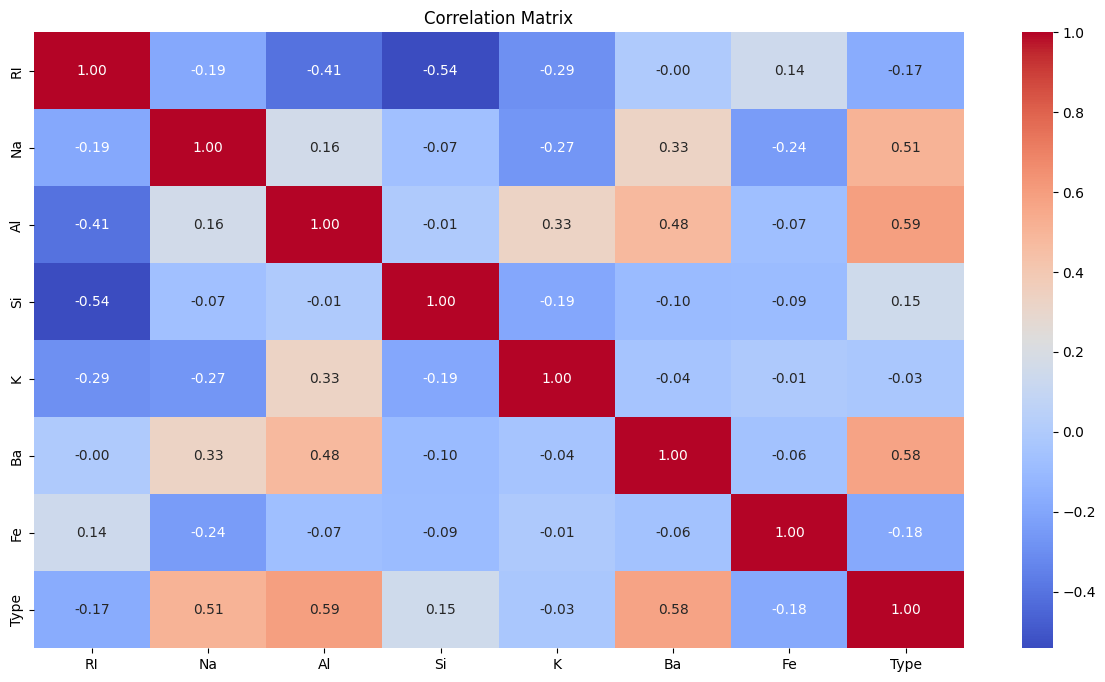

In [538]:
corr(df)

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Al      214 non-null    float64
 3   Si      214 non-null    float64
 4   K       214 non-null    float64
 5   Ba      214 non-null    float64
 6   Fe      214 non-null    float64
 7   Type    214 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.5 KB


Lucky, we don't have high corrrelation between features.

Train-test

In [540]:
X = df.drop(columns=['Type'])
y = df['Type']


In [541]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

As we have a lot of outliers, which can be useful for the analysis, the best is to import RobustScaler

In [542]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [543]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier


modelos_classificacao = [
    ('LogisticRegression', LogisticRegression(multi_class='multinomial', max_iter=1000)),
    ('RidgeClassifier', RidgeClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('CatBoostClassifier', CatBoostClassifier(verbose=False)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GaussianProcessClassifier', GaussianProcessClassifier()),
    ('LGBMClassifier', LGBMClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('ExtraTreesClassifier', ExtraTreesClassifier()),
    ('BaggingClassifier', BaggingClassifier())
]




Prediction test

In [544]:
from sklearn.metrics import classification_report
import pandas as pd


metricas = []


for name, model in modelos_classificacao:  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    
    for class_name, metrics in report_dict.items():
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:  
            
            metricas.append({
                'Model': name,
                'Class': class_name,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1-score'],
                'Support': metrics['support']
            })


metricas_df = pd.DataFrame(metricas)









    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 7
[LightGBM] [Info] Start training from score -1.072121
[LightGBM] [Info] Start training from score -1.033654
[LightGBM] [Info] Start training from score -2.438997
[LightGBM] [Info] Start training from score -3.058036
[LightGBM] [Info] Start training from score -3.212187
[LightGBM] [Info] Start training from score -2.059507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [545]:
pd.set_option('display.max_rows', 100)

In [546]:
metricas_df.head(100)

,Model,Class,Precision,Recall,F1-Score,Support
0,LogisticRegression,0,0.576923,0.789474,0.666667,19.0
1,LogisticRegression,1,0.520000,0.565217,0.541667,23.0
2,LogisticRegression,2,0.000000,0.000000,0.000000,4.0
3,LogisticRegression,3,1.000000,0.166667,0.285714,6.0
4,LogisticRegression,4,1.000000,0.666667,0.800000,3.0
5,LogisticRegression,5,0.909091,1.000000,0.952381,10.0
6,RidgeClassifier,0,0.631579,0.631579,0.631579,19.0
7,RidgeClassifier,1,0.515152,0.739130,0.607143,23.0
8,RidgeClassifier,2,0.000000,0.000000,0.000000,4.0
9,RidgeClassifier,3,1.000000,0.166667,0.285714,6.0


In [547]:
media_f1 = metricas_df.groupby('Model')['F1-Score'].mean().reset_index()

In [548]:
media_f1.head(10).sort_values(by='F1-Score', ascending = False)

,Model,F1-Score
2,CatBoostClassifier,0.760479
4,ExtraTreesClassifier,0.726967
1,BaggingClassifier,0.687957
3,DecisionTreeClassifier,0.681667
6,GradientBoostingClassifier,0.681661
8,LGBMClassifier,0.654206
9,LogisticRegression,0.541071
5,GaussianProcessClassifier,0.490163
7,KNeighborsClassifier,0.485822
0,AdaBoostClassifier,0.464017


Mean is incorrect, we should use ponderation

In [549]:

count_per_type = df.groupby('Type').size()

proportion_per_type = count_per_type / count_per_type.sum()
proportion_per_type = pd.DataFrame(proportion_per_type, columns=['Proportion'])
proportion_per_type = proportion_per_type.reset_index()
proportion_per_type = proportion_per_type.rename(columns={'Type': 'Class'})



proportion_per_type.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Class       6 non-null      int64  
 1   Proportion  6 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 228.0 bytes


In [550]:
metricas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      78 non-null     object 
 1   Class      78 non-null     object 
 2   Precision  78 non-null     float64
 3   Recall     78 non-null     float64
 4   F1-Score   78 non-null     float64
 5   Support    78 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.8+ KB


In [551]:
metricas_df['Class'] = metricas_df['Class'].astype(int)

In [552]:
metricas_df = proportion_per_type.merge(metricas_df, on='Class', how='left')


In [553]:
metricas_df.head(100)

,Class,Proportion,Model,Precision,Recall,F1-Score,Support
0,0,0.327103,LogisticRegression,0.576923,0.789474,0.666667,19.0
1,0,0.327103,RidgeClassifier,0.631579,0.631579,0.631579,19.0
2,0,0.327103,DecisionTreeClassifier,0.583333,0.736842,0.651163,19.0
3,0,0.327103,RandomForestClassifier,0.739130,0.894737,0.809524,19.0
4,0,0.327103,GradientBoostingClassifier,0.636364,0.736842,0.682927,19.0
5,0,0.327103,XGBClassifier,0.722222,0.684211,0.702703,19.0
6,0,0.327103,CatBoostClassifier,0.722222,0.684211,0.702703,19.0
7,0,0.327103,KNeighborsClassifier,0.521739,0.631579,0.571429,19.0
8,0,0.327103,GaussianProcessClassifier,0.592593,0.842105,0.695652,19.0
9,0,0.327103,LGBMClassifier,0.714286,0.789474,0.750000,19.0


In [554]:
metricas_df['F1-Score_Weight'] = metricas_df['Proportion']*metricas_df['F1-Score']

In [555]:
metricas_df.head()

,Class,Proportion,Model,Precision,Recall,F1-Score,Support,F1-Score_Weight
0,0,0.327103,LogisticRegression,0.576923,0.789474,0.666667,19.0,0.218069
1,0,0.327103,RidgeClassifier,0.631579,0.631579,0.631579,19.0,0.206591
2,0,0.327103,DecisionTreeClassifier,0.583333,0.736842,0.651163,19.0,0.212997
3,0,0.327103,RandomForestClassifier,0.739130,0.894737,0.809524,19.0,0.264798
4,0,0.327103,GradientBoostingClassifier,0.636364,0.736842,0.682927,19.0,0.223387


W

In [556]:
# Função para calcular a média ponderada corretamente
wm = lambda x: np.sum(x['F1-Score_Weight']  / np.sum(x['Proportion']))

# Agrupando por classe e calculando a média ponderada
metricas_df = metricas_df.groupby('Model').apply(wm).reset_index(name='Weighted_F1_Score')

# Exibir o resultado
print(metricas_df)



                         Model  Weighted_F1_Score
0           AdaBoostClassifier           0.449494
1            BaggingClassifier           0.685709
2           CatBoostClassifier           0.727440
3       DecisionTreeClassifier           0.657042
4         ExtraTreesClassifier           0.744357
5    GaussianProcessClassifier           0.607543
6   GradientBoostingClassifier           0.698440
7         KNeighborsClassifier           0.541406
8               LGBMClassifier           0.701064
9           LogisticRegression           0.590498
10      RandomForestClassifier           0.723380
11             RidgeClassifier           0.562763
12               XGBClassifier           0.692851


In [557]:
metricas_df.head(10).sort_values(by='Weighted_F1_Score', ascending = False)

,Model,Weighted_F1_Score
4,ExtraTreesClassifier,0.744357
2,CatBoostClassifier,0.727440
8,LGBMClassifier,0.701064
6,GradientBoostingClassifier,0.698440
1,BaggingClassifier,0.685709
3,DecisionTreeClassifier,0.657042
5,GaussianProcessClassifier,0.607543
9,LogisticRegression,0.590498
7,KNeighborsClassifier,0.541406
0,AdaBoostClassifier,0.449494


The best model is CatBoost

In [558]:
from sklearn.metrics import confusion_matrix

In [565]:
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [566]:
comparison_df = pd.DataFrame({
    'Real_Class': y_test.reset_index(drop=True), 
    'Predicted_Class': pd.Series(y_pred.flatten())
})

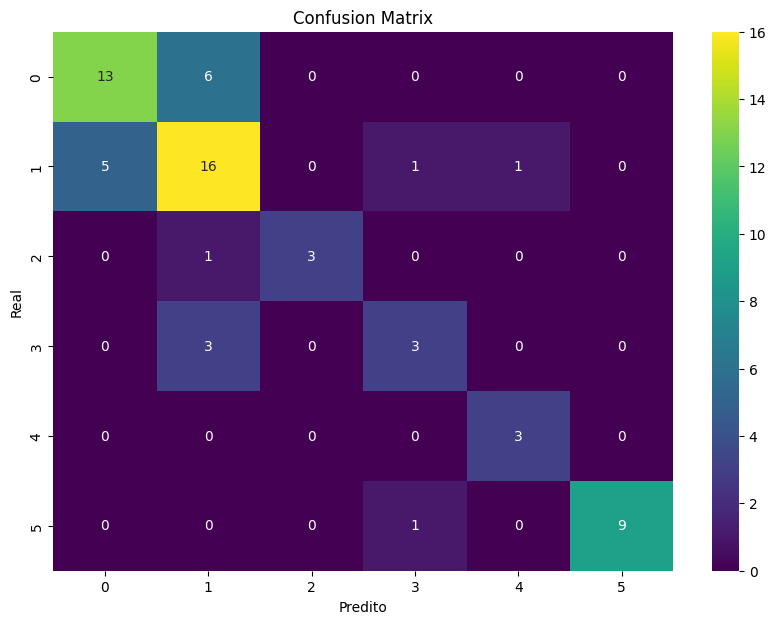

In [567]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [568]:
comparison_df = comparison_df.sample(20)
comparison_df.head(20)

,Real_Class,Predicted_Class
48,1,1
63,5,5
57,1,1
61,1,1
49,1,0
15,3,3
41,5,5
46,1,1
13,1,1
1,5,5


In [569]:
def error(df):
    df['Correct'] = df.apply(lambda row: 1 if row['Real_Class'] == row['Predicted_Class'] else 0, axis=1)
    return df.head(20)
    
error(comparison_df)   

,Real_Class,Predicted_Class,Correct
48,1,1,1
63,5,5,1
57,1,1,1
61,1,1,1
49,1,0,0
15,3,3,1
41,5,5,1
46,1,1,1
13,1,1,1
1,5,5,1


In [570]:
comparison_df['Correct'].value_counts(normalize = True)


Correct
1    0.85
0    0.15
Name: proportion, dtype: float64

Notes: 1) The next trial will be a balanced test. 2) In the next, we'll ignore some outliers. 